# Esercizio 12.1

Nell'esercizio 12 propone, utilizzando la libreria, una rete neurale in grado di riconoscere e classificare i numeri da 0 a 9. Dal dataset minst sono prelevate le immagini (28x28 pixel) di numeri che servono come dati di training per allenare la nostra rete neurale. In questo primo punto dell'esercizio viene richiesto semplicemente di cambiare l'ottimizzatore utilizzato.

In [68]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [69]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


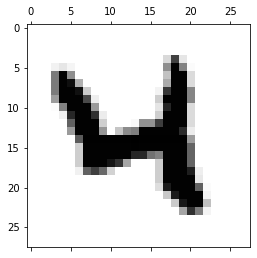

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [70]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [71]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [77]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [78]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.7667 - accuracy: 0.7717 - val_loss: 0.3142 - val_accuracy: 0.9162
Epoch 2/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.3917 - accuracy: 0.8879 - val_loss: 0.2418 - val_accuracy: 0.9328
Epoch 3/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.3166 - accuracy: 0.9092 - val_loss: 0.2033 - val_accuracy: 0.9401
Epoch 4/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.2707 - accuracy: 0.9234 - val_loss: 0.1779 - val_accuracy: 0.9472
Epoch 5/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.2378 - accuracy: 0.9330 - val_loss: 0.1597 - val_accuracy: 0.9525


10000/10000 [==============================] - 0s 49us/step

Test loss: 0.1596537207223475
Test accuracy: 0.9524999856948853


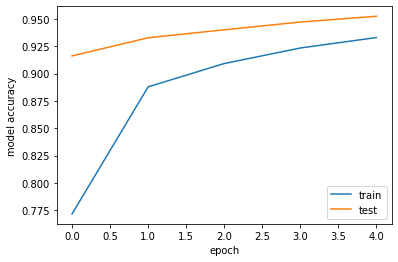

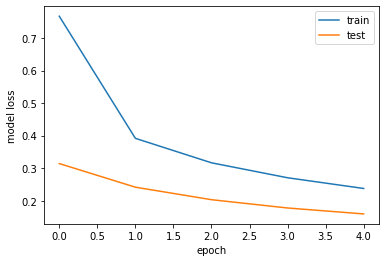

In [79]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

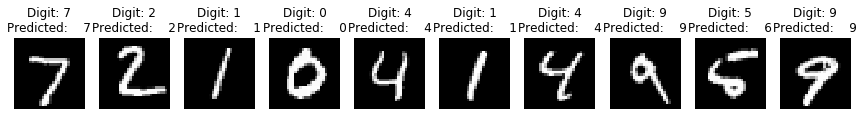

In [80]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Questi sono i risultati utilizzando l'ottimizzatore adadelta

![title](adadelta_model_accuracy.png)
![title](adadelta_model_loss.png)
![title](adadelta_.png)

Test loss: 0.06981476663476788

Test accuracy: 0.9776999950408936

Questi sono i risultati utilizzando l'ottimizzatore adagrad

![title](adagrad_model_accuracy.png)
![title](Adagrad_model_loss.png)
![title](adagrad_.png)

Test loss: 0.07095200252121722

Test accuracy: 0.9810000061988831

Come si può vedere dai risultati utilizzando adagrad e adadelta i risultati risultano essere migliori; infatti utilizzando l'ottimizzatore SGD il numero 5 preso come test viene identificato erroneamente come 6 (questo è dovuto al fatto che sia un caso un po' ambiguo in cui il numero non è disegnato chiaramente).